In [ ]:
#import libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn 
import sklearn.linear_model 
import matplotlib 
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/")



Mounted at /content/drive/


In [ ]:
#read file
df = pd.read_csv('/content/drive/MyDrive/Thesis/df_cleaned.csv',sep=",",header=0,index_col=False)

In [ ]:
X = df.drop('total_score',1)
y = df['total_score'].to_numpy()

In [ ]:
#One hot encode all categorical values
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore', sparse=True), object_cols)], remainder='passthrough')
X = columnTransformer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_test.shape

(10612, 334)

In [ ]:
from keras.layers import Dropout

# define and fit the final model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

gen_baseline = Sequential()
gen_baseline.add(Dense(334, input_dim=334, activation='relu'))
gen_baseline.add(Dense(256, activation='relu'))
gen_baseline.add(Dense(1, activation='linear'))

#define optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

#compile model
gen_baseline.compile(loss='mean_squared_error', optimizer=opt)
baseline_gen = gen_baseline.fit(X_train, y_train, batch_size=32768, epochs=1000, verbose=1,validation_data=(X_val, y_val),callbacks=[callback])


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_17/dense_49/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_17/dense_49/embedding_lookup_sparse/Reshape:0", shape=(None, 334), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_17/dense_49/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


32/32 [==============================] - 10s 210ms/step - loss: 63265.4883 - val_loss: 59591.0859
Epoch 2/1000
32/32 [==============================] - 9s 208ms/step - loss: 56013.9570 - val_loss: 52085.3516
Epoch 3/1000
32/32 [==============================] - 9s 208ms/step - loss: 47875.7969 - val_loss: 43073.5391
Epoch 4/1000
32/32 [==============================] - 9s 209ms/step - loss: 37823.7422 - val_loss: 31954.2754
Epoch 5/1000
32/32 [==============================] - 9s 210ms/step - loss: 26195.0020 - val_loss: 20097.8730
Epoch 6/1000
32/32 [==============================] - 9s 211ms/step - loss: 15011.7764 - val_loss: 10154.0244
Epoch 7/1000
32/32 [==============================] - 9s 210ms/step - loss: 6939.4868 - val_loss: 4301.0801
Epoch 8/1000
32/32 [==============================] - 9s 213ms/step - loss: 3154.1096 - val_loss: 2434.7185
Epoch 9/1000
32/32 [==============================] - 9s 211ms/step - loss: 2262.3772 - val_loss: 2186.7437
Epoch 10/1000
32/32 [=======

In [ ]:
#Model evaluation and comparison
print('RMSE in train set:', gen_baseline.evaluate(X_train, y_train, verbose=0))
print('RMSE in test set:', gen_baseline.evaluate(X_test, y_test, verbose=0))
print('RMSE in validation set:', gen_baseline.evaluate(X_val, y_val, verbose=0))

RMSE in train set: 1417.92236328125
RMSE in test set: 1419.611083984375
RMSE in validation set: 1405.5565185546875


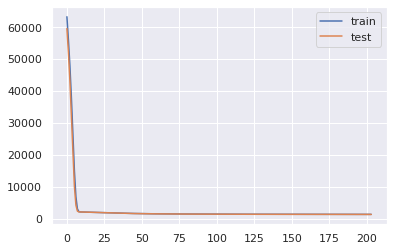

In [ ]:

#plot model
plt.plot(baseline_gen.history['loss'], label='train')
plt.plot(baseline_gen.history['val_loss'], label='test')
plt.legend()
plt.show()

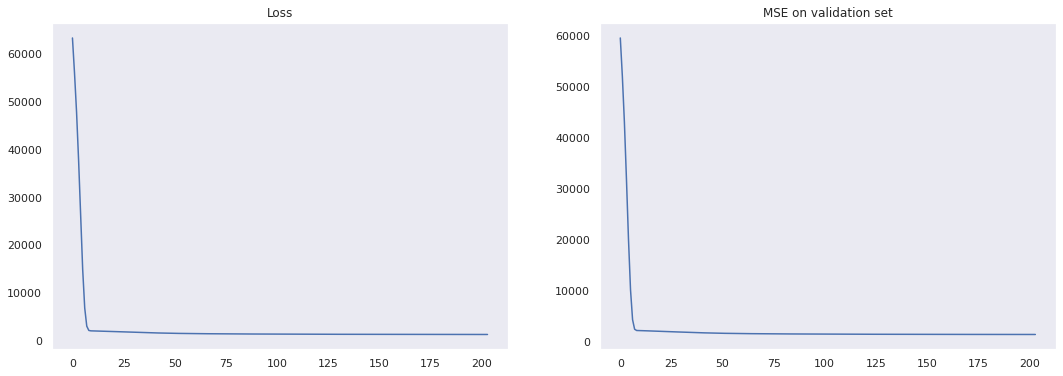

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:

#plot model
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(baseline_gen.history['loss'], label='train')
plt.title('Loss')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(baseline_gen.history['val_loss'], label='test')
plt.title('MSE on validation set')
plt.grid()
plt.savefig("Baseline performance.png", dpi=100)
plt.show()


files.download("Baseline performance.png")